# 二分木を実装しよう
最初から平衡木なんか作るからだめなんだ

### 参考
- Pythonによるアルゴリズム入門 (酒井和哉)

In [99]:
from graphviz import Digraph

In [100]:
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
        self.parent = None
    
    def __repr__(self):
        res = "Node(val:{}, left:{}, right:{}, parent:{})".format(
            self.val,
            self.left.val if self.left else None,
            self.right.val if self.right else None,
            self.parent.val if self.parent else None
        )
        return res

In [101]:
Node(5)

Node(val:5, left:None, right:None, parent:None)

In [102]:
class BSTree:
    def __init__(self):
        self.root = None
    
    def insert(self, node):
        """要素の挿入を行う
        Args:
            node (Node): 追加する要素
        """
        # 接点(parent)の探索
        parent = None
        ptr = self.root
        while ptr != None:
            parent = ptr
            ptr = parent.left if node.val < parent.val else parent.right
        
        # 要素の挿入
        node.parent = parent
        if parent == None:
            self.root = node
        elif node.val < parent.val:
            parent.left = node
        else:
            parent.right = node
    
    def delete(self, node):
        """要素の削除を行う

        Args:
            node (Node): 削除する要素
        """
        if node.left == None:
            self.transplant(node, node.right)
        elif node.right == None:
            self.transplant(node, node.left)
        else:
            y = self.search_min(node.right)

            # yがnodeの直下にない場合、yをnodeの真下に持ってくる必要がある
            if y.parent != node:
                # 一旦yを切り離す
                self.transplant(y, y.right)
                # yの右側にnodeの右側を貼り付ける
                y.right = node.right
                y.right.parent = y

            # yの左側にnodeの左側を貼り付ける
            self.transplant(node, y)
            y.left = node.left
            y.left.parent = y
    
    def transplant(self, u, v):
        """ノードの付け替えを行う

        Args:
            u (Node): 削除されるノード
            v (Node): 子となるノード
        """
        if u.parent == None:
            self.root = v
        elif u.parent.left == u:
            u.parent.left = v
        else:
            u.parent.right = v
        if v != None:
            v.parent = u.parent  # 親の更新
        
    @staticmethod
    def search_min(node) -> Node:
        """木の最小値の探索を行う

        Args:
            node (Node): 部分木のroot
        Returns:
            Node: 木の中で最小の値
        """
        while node.left:
            node = node.left
        
        return node
    
    def search(self, key) -> Node:
        """木の要素を探索する
        
        Args:
            key (Node): 探索する値
        Returns:
            Node: 見つかったノード
        """
        return self.partial_search(self.root, key)
    
    def partial_search(self, node, key) -> Node:
        """部分木の要素を探索する
        
        Args:
            root (Node): 部分木の根
            key : 探索する値
        Returns:
            Node: 見つかったノード
        """
        if node == None or node.val == key:
            return node
        elif key < node.val:
            return self.partial_search(node.left, key)
        else:
            return self.partial_search(node.right, key)
    
    def traverse(self, node=None):
        """木を巡回し、小さい順に値を返すジェネレータ

        Args:
            node=None (Node): 開始ノード
        Yields:
            Node: 見つかったノード
        """
        if node == None:
            node = self.root
        
        if node.left:
            yield from self.traverse(node.left)
        
        yield node

        if node.right:
            yield from self.traverse(node.right)
    
    def as_graph(self, format="png"):
        """グラフを可視化
        
        Args:
            format="png" (str): graphvizの出力形式
        Returns:
            graphviz.Digraph
        """

        graph = Digraph(format=format)
        fill = 0
        for node in self.traverse():
            v = str(node.val)
            graph.node(v)
        
        for node in self.traverse():
            v = str(node.val)
            if node.left:
                l = str(node.left.val)
                graph.edge(v, l)

            if node.right:
                r = str(node.right.val)
                graph.edge(v, r)
        
        return graph

## テスト

Node(val:10, left:5, right:20, parent:None)
Node(val:5, left:None, right:8, parent:10)
Node(val:8, left:None, right:None, parent:5)
Node(val:20, left:None, right:None, parent:10)
None
Node(val:10, left:5, right:20, parent:None)
None


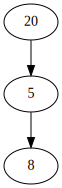

In [103]:
tree = BSTree()

tree.insert(Node(10))
tree.insert(Node(5))
tree.insert(Node(8))
tree.insert(Node(20))

# 存在する要素
print(tree.search(10))
print(tree.search(5))
print(tree.search(8))
print(tree.search(20))

# 存在しない要素
print(tree.search(100))

# 削除
x = tree.partial_search(tree.root, 10)
print(x)

tree.delete(x)

print( tree.partial_search(tree.root, 10) )

tree.as_graph()

In [104]:
tree = BSTree()

tree.insert(Node(10))
tree.insert(Node(5))
tree.insert(Node(8))
tree.insert(Node(20))
tree.insert(Node(1))
tree.insert(Node(35))
tree.insert(Node(40))
tree.insert(Node(33))

# 木の操作
for node in tree.traverse():
    print(node)

# 可視化
graph = tree.as_graph()
graph.render("./images/bstree")

Node(val:1, left:None, right:None, parent:5)
Node(val:5, left:1, right:8, parent:10)
Node(val:8, left:None, right:None, parent:5)
Node(val:10, left:5, right:20, parent:None)
Node(val:20, left:None, right:35, parent:10)
Node(val:33, left:None, right:None, parent:35)
Node(val:35, left:33, right:40, parent:20)
Node(val:40, left:None, right:None, parent:35)


'images/bstree.png'

![tree](./images/BSTree.png)

## 最悪パターン

愚直な実装の二分探索木はソート済み要素の追加に弱い

In [105]:
tree = BSTree()

for i in range(5):
    tree.insert(Node(i))

graph = tree.as_graph()
graph.render("./images/bstree_worst")

'images/bstree_worst.png'

![worst](./images/BSTree_worst.png)

## delete, insertをsearchで再実装

In [106]:
class BSTree:
    def __init__(self):
        self.root = None
    
    def insert(self, key):
        """要素の挿入を行う
        Args:
            key : 追加する要素
        """
        if self.root == None:
            self.root = Node(key)

        # 接点(parent)の探索
        parent, result = self.search(key)

        if result: return
        
        # 要素の挿入
        node = Node(key)
        node.parent = parent
        if node.val < parent.val:
            parent.left = node
        else:
            parent.right = node

    def delete(self, key):
        target, result = self.search(key)

        if result:
            self.delete_node(target)
    
    def delete_node(self, node):
        """要素の削除を行う

        Args:
            node (Node): 削除する要素
        """
        if node.left == None:
            self.transplant(node, node.right)
        elif node.right == None:
            self.transplant(node, node.left)
        else:
            y = self.search_min(node.right)

            # yがnodeの直下にない場合、yをnodeの真下に持ってくる必要がある
            if y.parent != node:
                # 一旦yを切り離す
                self.transplant(y, y.right)
                # yの右側にnodeの右側を貼り付ける
                y.right = node.right
                y.right.parent = y

            # yの左側にnodeの左側を貼り付ける
            self.transplant(node, y)
            y.left = node.left
            y.left.parent = y
    
    def transplant(self, u, v):
        """ノードの付け替えを行う

        Args:
            u (Node): 削除されるノード
            v (Node): 子となるノード
        """
        if u.parent == None:
            self.root = v
        elif u.parent.left == u:
            u.parent.left = v
        else:
            u.parent.right = v
        if v != None:
            v.parent = u.parent  # 親の更新
        
    @staticmethod
    def search_min(node) -> Node:
        """木の最小値の探索を行う

        Args:
            node (Node): 部分木のroot
        Returns:
            Node: 木の中で最小の値
        """
        while node.left:
            node = node.left
        
        return node
    
    def search(self, key) -> Node:
        """木の要素を探索する
        
        Args:
            key (Node): 探索する値
        Returns:
            Node: 見つかったノード
        """

        last = None
        node = self.root

        while node:
            if node.val == key:
                return node, True
            
            last = node
            if key < node.val:
                node = node.left
            else:
                node = node.right
        
        
        return last, False
    
    def traverse(self, node=None):
        """木を巡回し、小さい順に値を返すジェネレータ

        Args:
            node=None (Node): 開始ノード
        Yields:
            Node: 見つかったノード
        """
        if node == None:
            node = self.root
        
        if node.left:
            yield from self.traverse(node.left)
        
        yield node

        if node.right:
            yield from self.traverse(node.right)
    
    def as_graph(self, format="png"):
        """グラフを可視化
        
        Args:
            format="png" (str): graphvizの出力形式
        Returns:
            graphviz.Digraph
        """

        graph = Digraph(format=format)
        fill = 0
        for node in self.traverse():
            v = str(node.val)
            graph.node(v)
        
        for node in self.traverse():
            v = str(node.val)
            if node.left:
                l = str(node.left.val)
                graph.edge(v, l)

            if node.right:
                r = str(node.right.val)
                graph.edge(v, r)
        
        return graph

(Node(val:10, left:5, right:20, parent:None), True)
(Node(val:5, left:None, right:8, parent:10), True)
(Node(val:8, left:None, right:None, parent:5), True)
(Node(val:20, left:None, right:None, parent:10), True)
(Node(val:20, left:None, right:None, parent:10), False)


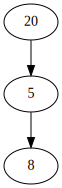

In [107]:
tree = BSTree()

tree.insert(10)
tree.insert(5)
tree.insert(8)
tree.insert(20)

# 存在する要素
print(tree.search(10))
print(tree.search(5))
print(tree.search(8))
print(tree.search(20))

# 存在しない要素
print(tree.search(100))

# 削除
tree.delete(10)

# 表示
tree.as_graph()
